In [1]:
#Final Lab: Integrating and Visualizing Disparate Data Sources

import shapefile
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#had to put these manual displays to make sure I could see all the the data. 
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline 
import random
import multiprocessing
import scipy

#UNIQUE BECAUSE I AM COMPARING MY PREDICTION MODEL OF FINDING 2020 DENSITY WITH THERE OWN. 

#If things aren't working, disable this!!!:
import warnings
warnings.filterwarnings("ignore")

height has been deprecated.



In [2]:
#loading in my dataset
SKorea_dta = pd.read_csv("NData.csv")
SKorea_dta

asdf_id  viirs_vcmcfg_dnb_composites_v10_yearly_max.2012.mean  viirs_vcmcfg_dnb_composites_v10_yearly_max.2012.sum  viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean  viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.sum  udel_precip_mean.1990.mean  udel_precip_mean.2000.mean  udel_precip_mean.2010.mean  ucdp_deaths_171.1990.sum  ucdp_deaths_171.2000.sum  ucdp_deaths_171.2010.sum  gpw_v4_density.2020.mean  gpw_v4_density.2010.mean  gpw_v4_density.2000.mean  gpw_v4_count.2000.sum  gpw_v4_count.2010.sum  gpw_v4_count.2020.sum  access_50k.none.mean        NAME_2       NAME_0             NAME_1    VARNAME_2 TYPE_2  Shape_Area ENGTYPE_2  Shape_Length  HASC_2  ID_2  CCA_2  ID_0  ID_1  ISO  CCN_2    NL_NAME_2  dist_to_water.none.mean  udel_air_temp_v401_mean.2010.mean  udel_air_temp_v401_mean.2000.mean
0          0                                          18.438246                                           5198.102539                                            17.996170                                           5076.290527                    112.683333                  107.700000                  118.525000                         0                         0                         0               5771.579900               6009.833232               5889.784073          294557.843800           3.010531e+05           2.895081e+05             17.081770           Buk  South Korea              Busan          NaN     Gu    0.004931  District      0.331577     NaN     1    NaN   213     1  KOR    NaN       북구| 北區              2462.297759                          14.591667                          14.691667
1          1                                          57.686311                                           9323.638672                                            61.387862                                           9930.230469                           NaN                         NaN                         NaN                         0                         0                         0              11664.216900              13388.262250              14453.916120          409531.250000           3.794545e+05           3.306352e+05              6.766018      Busanjin  South Korea              Busan          NaN     Gu    0.002789  District      0.227246     NaN     2    NaN   213     1  KOR    NaN   부산진구| 釜山鎭區              4670.692085                                NaN                                NaN
2          2                                          76.484877                                           3179.562500                                            75.703430                                           3138.587646                           NaN                         NaN                         NaN                         0                         0                         0               9905.670545              13214.560140              16616.576190          113769.062500           9.031188e+04           6.755514e+04              4.856421          Dong  South Korea              Busan          NaN     Gu    0.000715  District      0.160996     NaN     3    NaN   213     1  KOR    NaN       동구| 東區              3709.204270                                NaN                                NaN
3          3                                          65.138871                                           7862.746094                                            64.001268                                           7726.499023                           NaN                         NaN                         NaN                         0                         0                         0              10768.361630              12196.383090              12982.520770          277083.093800           2.601343e+05           2.295126e+05             15.015433       Dongnae  South Korea              Busan          NaN     Gu    0.002094  District      0.213355     NaN     4    NaN   213     1  KOR    NaN     동래구| 東萊區              6297.931197           

In [13]:
#For my model, I have selected to predict child mortality based on population, 
#urban access, and nighttime lights.  To interpret what the numbers in the above table mean,
#take a careful look at the metadata you retrieve.
#You are expected to add additional columns of data for this analysis, retrieving your own data
#from www.geoquery.org .
#First, I'm going to build a predictive model based on the past (note, one thing
#is intentionally theoretically wrong with this model, AND you can do much better.
#Think carefully about what variables you use!!):
#MAE = MEAN AVERAGE ERROR

    #Historic model - 
SKorea_dta = pd.read_csv('NData.csv')
SKorea_dta_NoNA = SKorea_dta[['gpw_v4_density.2010.mean', #annual average population density, what we are predicting
                                  'viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean', #VIIRS Nighttime Lights 
                                  'gpw_v4_count.2010.sum', #population count (sum)
                                  'dist_to_water.none.mean', #distance to water
                                  'udel_air_temp_v401_mean.2010.mean', #annual average air temperature 
                                  'access_50k.none.mean']].dropna() #access to city 

length = len(SKorea_dta_NoNA)

outcome = SKorea_dta_NoNA['gpw_v4_density.2010.mean'].values.reshape(length, 1)

#I want to introduce uncertainty into Nighttime Lights and population.
#You will want to use literature to justify the error you add,
#with citations!
    
#I want to introduce uncertainty into Nighttime Lights and population.
#You will want to use literature to justify the error you add,
#with citations!
for i in range(len(SKorea_dta_NoNA)):
    
    lower_bound = SKorea_dta_NoNA.iloc[i]['gpw_v4_density.2010.mean'] * 0.9
    upper_bound = SKorea_dta_NoNA.iloc[i]['gpw_v4_density.2010.mean'] * 1.1
    if(lower_bound < 0):
        lower_bound = 0

    #Read your metadata!
    if(upper_bound > 1030000):
        upper_bound = 1030000       

    SKorea_dta_NoNA.iloc[i]['gpw_v4_density.2015.mean'] = random.uniform(lower_bound,upper_bound)
    #-------------------------------------------------

    lower_bound = SKorea_dta_NoNA.iloc[i]['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] * 0.85
    upper_bound = SKorea_dta_NoNA.iloc[i]['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] * 1.1
    if(lower_bound < 0):
        lower_bound = 0

    #Read your metadata!
    if(upper_bound > 75):
        upper_bound = 75

    SKorea_dta_NoNA.iloc[i]['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] = random.uniform(lower_bound,upper_bound)
    
    #--------------------------------------------------------
    lower_bound = SKorea_dta_NoNA.iloc[i]['gpw_v4_count.2010.sum'] * 0.9 #the changing of these end variables mention
    upper_bound = SKorea_dta_NoNA.iloc[i]['gpw_v4_count.2010.sum'] * 1.1
    if(lower_bound < 0):
        lower_bound = 0

    #Read your metadata!
    if(upper_bound > 5.0e+05):
        upper_bound = 5.0e+05      

    SKorea_dta_NoNA.iloc[i]['gpw_v4_count.2010.sum'] = random.uniform(lower_bound,upper_bound)
    
    
    #---------------------------------------------------------------  
    lower_bound = SKorea_dta_NoNA.iloc[i]['udel_air_temp_v401_mean.2010.mean'] * 0.9
    upper_bound = SKorea_dta_NoNA.iloc[i]['udel_air_temp_v401_mean.2010.mean'] * 1.15
    if(lower_bound < 0):
        lower_bound = 0

    #Read your metadata!
    if(upper_bound > 15):
        upper_bound = 15
        
    SKorea_dta_NoNA.iloc[i]['udel_air_temp_v401_mean.2010.mean'] = random.uniform(lower_bound,upper_bound)
    

predictors = SKorea_dta_NoNA[['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean', #VIIRS Nighttime Lights 
                                  'gpw_v4_count.2010.sum', #population count (sum)
                                  'dist_to_water.none.mean', #distance to water
                                  'udel_air_temp_v401_mean.2010.mean', #annual average air temperature
                                  'access_50k.none.mean']].values.reshape(length, 5) 

historic_model = linear_model.LinearRegression()
historic_model.fit(predictors, outcome)  
estimated_2010_v4_density = historic_model.predict(predictors)

MAE = np.mean(np.abs(estimated_2010_v4_density - SKorea_dta_NoNA['gpw_v4_density.2010.mean'].values))
    
print("Model MAE:")
print(MAE)
print("Model Coefficients:")
print(historic_model.coef_)

Model MAE:
6242.8614431
Model Coefficients:
[[  2.67284266e+02   3.69667430e-03  -1.76190902e-02  -2.59926288e+02
    1.39604848e+00]]


Prediction MAE:
24627.3088169
Predictions within 10, 20, and 30%
0.00897088320219
0.0184928034561
0.0271551059093
Top 10 Districts in South Korea, Predicted Population Density, 2020; Observed, 2010:
        NAME_2     2020_pred  gpw_v4_density.2010.mean
146  Sancheong  83230.652043                 45.722673
172       Muju  78528.576652                 46.746140
70      Yanggu  74757.369463                 27.402215
138    Hamyang  73767.278420                 51.606409
63        Inje  72530.540629                 17.979301
129  Yeongyang  68621.578916                 20.799004
132   Geochang  67764.348025                 76.969332
62    Hwacheon  67531.774455                 25.731530
61   Hongcheon  65925.703687                 35.799586
167      Imsil  64562.751708                 36.348384


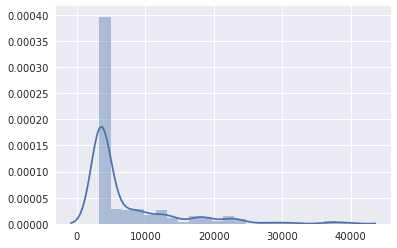

In [14]:
#In my case, I know how well my model performs in 1990, based on 1990s data - i.e.,
#I can get values accurate to within approximately 9.5 under-5 mortality events.
#You are expected to do better than this - there are *many* sources of data
#not currently being used that you can draw on.
#Treat my model as the "baseline" model - i.e., the first, easiest model
#you could run. 

#I'm now going to use my baseline model to project into the future. 
#To do this, I need future estimates of data I would not have in 1999:
#Population,
#Urban Access,
#Nighttime Lights
SKorea_dta_predictions = SKorea_dta[['gpw_v4_density.2010.mean', #annual average population density, what we are predicting
                                  'access_50k.none.mean',  #access to city
                                  'gpw_v4_count.2010.sum', #population count (sum)
                                  'viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean', #VIIRS Nighttime Lights 
                                  'dist_to_water.none.mean', #distance to water 
                                  'udel_air_temp_v401_mean.2010.mean',
                                  'gpw_v4_density.2020.mean',
                                  'NAME_2']].dropna() 


#There is no meaningful way for me to get new data for urban access, so I will use
#the same data for 2000 in 1990, and would discuss this in my limitations.  I.e.:
#"While it is known that urban accessibility has an impact on child mortatlity,
#no updated information is available that provides measurements for the year 2000.
#Following this, this analysis uses the same input data for both calibration and prediction."

#For population, I have two points in time - 1995 and 1990. 
#I will use the advanced "draw a straight line to 2000" technique to predict
#what population will be.  There are much, much more complex demographic models you can employ;
#I intentionally omit them here for simplicity.

#include 1980, future include 1990. Predictor of Childhood predictability 
SKorea_dta_predictions['2020_pop'] = (SKorea_dta['gpw_v4_count.2010.sum'] + 
                                        10*((SKorea_dta['gpw_v4_count.2010.sum'] - 
                                            SKorea_dta['gpw_v4_count.2000.sum'])/6))
#1995 + 1995 growth factor. Justify the growth factor with real world growth data. 


#Same thing for NTL. You can of course do much better than this straight line!
SKorea_dta_predictions['2020_ntl'] = (SKorea_dta['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] + 
                                        4*((SKorea_dta['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] - 
                                            SKorea_dta['viirs_vcmcfg_dnb_composites_v10_yearly_max.2012.mean'])/6))

SKorea_dta_predictions['2020_air_temp'] = (SKorea_dta['udel_air_temp_v401_mean.2010.mean'] + 
                                        10*((SKorea_dta['udel_air_temp_v401_mean.2010.mean'] - 
                                            SKorea_dta['udel_air_temp_v401_mean.2000.mean'])/6))

#Now, I'm going to create my future predictors dataset using these new values.
predictors_millenium = SKorea_dta_predictions[['access_50k.none.mean',
                           'dist_to_water.none.mean',
                           '2020_pop',
                           '2020_ntl',
                           '2020_air_temp']].values.reshape(length, 5)

#And, finally, predict the future.
population_density_2020_prediction =  historic_model.predict(predictors_millenium)
SKorea_dta_predictions['2020_pred'] = population_density_2020_prediction
#How accurate was this prediction based on real data?:
abs_diff_pred = np.abs(population_density_2020_prediction - SKorea_dta_predictions['gpw_v4_density.2020.mean'].values)
seaborn.distplot(abs_diff_pred[0])
MAE_pred = np.mean(np.abs(population_density_2020_prediction - SKorea_dta_predictions['gpw_v4_density.2020.mean'].values))
print("Prediction MAE:")
print(MAE_pred)


#Finally, I want to estimate the number of units of observation for which I
#correctly estimated the true value within 10%, 20%, and 30% of the truth,
#and highlight the top 10 areas with the worst rates of child mortality.
tenPercent = abs_diff_pred <= SKorea_dta_predictions['gpw_v4_density.2020.mean'].values * 0.1
twentyPercent = abs_diff_pred <= SKorea_dta_predictions['gpw_v4_density.2020.mean'].values * 0.2
thirtyPercent = abs_diff_pred <= SKorea_dta_predictions['gpw_v4_density.2020.mean'].values * 0.3
print("Predictions within 10, 20, and 30%")
print(np.mean(tenPercent))
print(np.mean(twentyPercent))
print(np.mean(thirtyPercent))

top = SKorea_dta_predictions.nlargest(10, '2020_pred')
print("Top 10 Districts in South Korea, Predicted Population Density, 2020; Observed, 2010:")
print(top[["NAME_2",'2020_pred','gpw_v4_density.2010.mean']])

#worry less about the prediction error! 

In [ ]:
#####Putting it all together, with uncertainty this time!#######
#As always in this course, we don't believe our data is perfect.
#As one example, I want to test my assumption of linear population and NTL
#growth.  I am also going to assume my measurements of NTL aren't perfect,
#but are accurate to within 10% of the true value.
#I base this on desk research into Nighttime Lights 
#(Remote Sensing and GIS Accuracy Assesment, 20.4 - Conclusions),
#Indicates a R2 value of .9812 of NTL vs. other data, suggesting a high
#degree of accuracy.  I round this down to 90% accuracy to make for
# a very conservative test.
#Note this code intentionally has a number of small issues -i.e.,
#it is possible to estimate errors that result in negative populations
#as it is written.  Make sure to fix these.
#How big of a difference could introducing this uncertainty make?

import shapefile
import pandas
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline 
import random
import multiprocessing
import scipy

#If things aren't working, disable this!!!:
import warnings
warnings.filterwarnings("ignore")



def PopulationDensity(Person_id):
    print("Person " + str(Person_id) + " beginning.")
    scipy.random.seed()
    
    
    #Historic model - 
    SKorea_dta = pd.read_csv('NData.csv')
    SKorea_dta_NoNA = SKorea_dta[['gpw_v4_density.2010.mean', #annual average population density, what we are predicting
                                  'viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean', #VIIRS Nighttime Lights 
                                  'gpw_v4_count.2010.sum', #population count (sum)
                                  'dist_to_water.none.mean', #distance to water
                                  'udel_air_temp_v401_mean.2010.mean',]].dropna() #access to city 

    length = len(SKorea_dta_NoNA)

    outcome = SKorea_dta_NoNA['gpw_v4_density.2010.mean'].values.reshape(length, 1)

    
#I want to introduce uncertainty into Nighttime Lights and population.
#You will want to use literature to justify the error you add,
#with citations!
    for i in range(len(SKorea_dta_NoNA)):

        lower_bound = SKorea_dta_NoNA.iloc[i]['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] * 0.9
        upper_bound = SKorea_dta_NoNA.iloc[i]['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] * 1.15
        if(lower_bound < 0):
            lower_bound = 0

        #Read your metadata!
        if(upper_bound > 80):
            upper_bound = 80

        SKorea_dta_NoNA.iloc[i]['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] = random.uniform(lower_bound,upper_bound)
    
    #--------------------------------------------------------
        lower_bound = SKorea_dta_NoNA.iloc[i]['gpw_v4_count.2010.sum'] * 0.25 #the changing of these end variables mention
        upper_bound = SKorea_dta_NoNA.iloc[i]['gpw_v4_count.2010.sum'] * 1.185
        if(lower_bound < 0):
            lower_bound = 0

    #Read your metadata!
        if(upper_bound > 40000):
            upper_bound = 40000      

        SKorea_dta_NoNA.iloc[i]['gpw_v4_count.2010.sum'] = random.uniform(lower_bound,upper_bound)
    
    
    #---------------------------------------------------------------  
        lower_bound = SKorea_dta_NoNA.iloc[i]['udel_air_temp_v401_mean.2010.mean'] * 0.0015
        upper_bound = SKorea_dta_NoNA.iloc[i]['udel_air_temp_v401_mean.2010.mean'] * 1.55
        if(lower_bound < 0):
            lower_bound = 0

    #Read your metadata!
        if(upper_bound > 35):
            upper_bound = 35
        
        SKorea_dta_NoNA.iloc[i]['udel_air_temp_v401_mean.2010.mean'] = random.uniform(lower_bound,upper_bound)
    

    predictors = SKorea_dta_NoNA[['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean', #VIIRS Nighttime Lights 
                                  'gpw_v4_count.2010.sum', #population count (sum)
                                  'dist_to_water.none.mean', #distance to water
                                  'udel_air_temp_v401_mean.2010.mean',]].values.reshape(length, 4) 

    historic_model = linear_model.LinearRegression()
    historic_model.fit(predictors, outcome) 
    estimated_2010_pop_density = historic_model.predict(predictors)
    MAE = np.mean(np.abs(estimated_2010_pop_density - SKorea_dta_NoNA['gpw_v4_density.2010.mean'].values))

    #Future Predictions___________________________________________________________
    
    SKorea_dta_predictions = SKorea_dta[['gpw_v4_density.2010.mean', #annual average population density, what we are predicting
                                  'viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean', #VIIRS Nighttime Lights
                                  'viirs_vcmcfg_dnb_composites_v10_yearly_max.2012.mean',
                                  'gpw_v4_count.2010.sum', #population count (sum)
                                  'gpw_v4_count.2000.sum',
                                  'dist_to_water.none.mean', #distance to water
                                  'udel_air_temp_v401_mean.2010.mean', #annual average air temperature 
                                  'udel_air_temp_v401_mean.2000.mean',
                                  'gpw_v4_density.2020.mean',
                                  'NAME_2']].copy(deep=True).dropna()

    #I want to introduce considerable uncertainty into this population estimate.
    #From desk research, I have found that population estimates in Cameroon are highly variable,
    #ranging from +25 to -25%.  Because I want to be particularly conservative in my estimate
    #due to my own uncertainty if linear models are correct, I'm going to round this up to
    #+/- 30%.
    
    
    SKorea_dta_predictions['2020_pop'] = (SKorea_dta_predictions['gpw_v4_count.2010.sum'] + 
                                        5*((SKorea_dta_predictions['gpw_v4_count.2010.sum'] - 
                                            SKorea_dta_predictions['gpw_v4_count.2000.sum'])/6))

    for i in range(len(SKorea_dta_predictions)):
        lower_bound = SKorea_dta_predictions.iloc[i]['2020_pop'] * 0.4
        upper_bound = SKorea_dta_predictions.iloc[i]['2020_pop'] * 1.6
        
            
        SKorea_dta_predictions.iloc[i]['2000_pop'] = random.uniform(lower_bound,upper_bound)
        
         #I am adding a lot of uncertainty to the urban access metric, representing
        #very little confidence in the estimate.
       
        
    #Same thing for NTL.  To be conservative, I am adding an additional 30% of 
    #uncertainty to the original 10% in the historic model.
    
    SKorea_dta_predictions['2020_ntl'] = (SKorea_dta_predictions['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] + 
                                        5*((SKorea_dta_predictions['viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean'] - 
                                            SKorea_dta_predictions['viirs_vcmcfg_dnb_composites_v10_yearly_max.2012.mean'])/2))

    for i in range(len(SKorea_dta_predictions)):
        lower_bound = SKorea_dta_predictions.iloc[i]['2020_ntl'] * 0.7
        upper_bound = SKorea_dta_predictions.iloc[i]['2020_ntl'] * 1.3

            
        SKorea_dta_predictions.iloc[i]['2020_ntl'] = random.uniform(lower_bound,upper_bound)
        
    #Same thing for Air Temperature---------------------------
    SKorea_dta_predictions['2020_air_temp'] = (SKorea_dta_predictions['udel_air_temp_v401_mean.2010.mean'] + 
                                        5*((SKorea_dta_predictions['udel_air_temp_v401_mean.2010.mean'] - 
                                            SKorea_dta_predictions['udel_air_temp_v401_mean.2000.mean'])/6))
    
    for i in range(len(SKorea_dta_predictions)):
        lower_bound = SKorea_dta_predictions.iloc[i]['2020_air_temp'] * 0.7
        upper_bound = SKorea_dta_predictions.iloc[i]['2020_air_temp'] * 1.3
        
        SKorea_dta_predictions.iloc[i]['2020_air_temp'] = random.uniform(lower_bound,upper_bound)
        
        #I am adding a lot of uncertainty to the distance to water metric as well. 
        lower_bound = SKorea_dta_predictions.iloc[i]['dist_to_water.none.mean'] * 0.1
        upper_bound = SKorea_dta_predictions.iloc[i]['dist_to_water.none.mean'] * 1.5
        

        SKorea_dta_predictions.iloc[i]['dist_to_water.none.mean'] = random.uniform(lower_bound,upper_bound)

    
    population_density_2020_prediction =  (historic_model.coef_[0][0] * SKorea_dta_predictions['2020_pop'].values +
                                        historic_model.coef_[0][1] *  SKorea_dta_predictions['2020_ntl'].values +
                                        historic_model.coef_[0][2] * SKorea_dta_predictions['2020_air_temp'].values +
                                        historic_model.coef_[0][3] * SKorea_dta_predictions['dist_to_water.none.mean'].values)
        
    #I'm going to save the top 10 locations, and my overall accuracy
    #at the 20% threshold (i.e., number of estimates I get within 20%)
    #based on the true 2000 data.
    #difference between my prediction and actual. 
    #MAE = np.mean(np.abs(population_density_2020_prediction - SKorea_dta_predictions['gpw_v4_density.2020.mean'].values))
    #abs_diff_pred = np.abs(child_mortality_2000_prediction - cameroon_dta_predictions['africa_child_mortality.2000.mean'].values)
    #twentyPercent = np.mean(abs_diff_pred <= 
    #cameroon_dta_predictions['africa_child_mortality.2000.mean'].values * 0.2)
    
    SKorea_dta_predictions['2020_pred'] = population_density_2020_prediction
    top = SKorea_dta_predictions.nlargest(5, '2020_pred')
    
    write_out = open("./sim_res/NData_"+str(random.random())+".csv",mode='w')
    for i in SKorea_dta_predictions.loc[SKorea_dta_predictions["NAME_2"].isin(top["NAME_2"].values)].NAME_2.values:
        write_out.write(i + ",")
    write_out.write(str(np.mean(MAE)))
    write_out.close()
    
    print("Person " + str(Person_id) + " completed.")
    
iterations = 5000

print("You have access to a maximum of " + str(multiprocessing.cpu_count()*2)+ " threads.")
pool = multiprocessing.Pool(multiprocessing.cpu_count()*2-2)

result = pool.map(PopulationDensity, range(iterations))

You have access to a maximum of 16 threads.
Person 0 beginning.
Person 90 beginning.
Person 180 beginning.
Person 270 beginning.
Person 360 beginning.
Person 810 beginning.
Person 630 beginning.
Person 720 beginning.
Person 900 beginning.
Person 450 beginning.
Person 990 beginning.
Person 1080 beginning.
Person 1170 beginning.
Person 540 beginning.
Person 90 completed.
Person 91 beginning.
Person 900 completed.
Person 901 beginning.
Person 1080 completed.
Person 1081 beginning.
Person 270 completed.
Person 271 beginning.
Person 1170 completed.
Person 1171 beginning.
Person 720 completed.
Person 721 beginning.
Person 0 completed.
Person 1 beginning.
Person 540 completed.
Person 541 beginning.
Person 630 completed.
Person 631 beginning.
Person 180 completed.
Person 181 beginning.
Person 990 completed.
Person 991 beginning.
Person 810 completed.
Person 811 beginning.
Person 450 completed.
Person 451 beginning.
Person 360 completed.
Person 361 beginning.
Person 91 completed.
Person 92 begi

Person 284 beginning.
Person 1183 completed.
Person 1184 beginning.
Person 102 completed.
Person 103 beginning.
Person 1003 completed.
Person 1004 beginning.
Person 1093 completed.
Person 1094 beginning.
Person 462 completed.
Person 463 beginning.
Person 193 completed.
Person 194 beginning.
Person 822 completed.
Person 823 beginning.
Person 733 completed.
Person 734 beginning.
Person 372 completed.
Person 373 beginning.
Person 13 completed.
Person 14 beginning.
Person 553 completed.
Person 554 beginning.
Person 913 completed.
Person 914 beginning.
Person 284 completed.
Person 285 beginning.
Person 1184 completed.
Person 1185 beginning.
Person 643 completed.
Person 644 beginning.
Person 1004 completed.
Person 1005 beginning.
Person 103 completed.
Person 104 beginning.
Person 1094 completed.
Person 1095 beginning.
Person 194 completed.
Person 195 beginning.
Person 14 completed.
Person 15 beginning.
Person 463 completed.
Person 464 beginning.
Person 823 completed.
Person 824 beginning.
Pe

Person 117 beginning.
Person 385 completed.
Person 386 beginning.
Person 925 completed.
Person 926 beginning.
Person 834 completed.
Person 835 beginning.
Person 206 completed.
Person 207 beginning.
Person 297 completed.
Person 298 beginning.
Person 1016 completed.
Person 1017 beginning.
Person 475 completed.
Person 476 beginning.
Person 566 completed.
Person 567 beginning.
Person 1198 completed.
Person 1199 beginning.
Person 117 completed.
Person 118 beginning.
Person 27 completed.
Person 28 beginning.
Person 1106 completed.
Person 1107 beginning.
Person 656 completed.
Person 657 beginning.
Person 386 completed.
Person 387 beginning.
Person 746 completed.
Person 747 beginning.
Person 926 completed.
Person 927 beginning.
Person 835 completed.
Person 836 beginning.
Person 207 completed.
Person 208 beginning.
Person 298 completed.
Person 299 beginning.
Person 1017 completed.
Person 1018 beginning.
Person 476 completed.
Person 477 beginning.
Person 567 completed.
Person 568 beginning.
Pers

Person 1210 completed.
Person 1211 beginning.
Person 758 completed.
Person 759 beginning.
Person 487 completed.
Person 488 beginning.
Person 398 completed.
Person 399 beginning.
Person 40 completed.
Person 41 beginning.
Person 579 completed.
Person 580 beginning.
Person 669 completed.
Person 670 beginning.
Person 311 completed.
Person 312 beginning.
Person 131 completed.
Person 132 beginning.
Person 848 completed.
Person 849 beginning.
Person 940 completed.
Person 941 beginning.
Person 1029 completed.
Person 1030 beginning.
Person 1119 completed.
Person 1120 beginning.
Person 220 completed.
Person 221 beginning.
Person 1211 completed.
Person 1212 beginning.
Person 759 completed.
Person 760 beginning.
Person 399 completed.
Person 400 beginning.
Person 488 completed.
Person 489 beginning.
Person 41 completed.
Person 42 beginning.
Person 580 completed.
Person 581 beginning.
Person 670 completed.
Person 671 beginning.
Person 132 completed.
Person 133 beginning.
Person 312 completed.
Person

Person 1042 beginning.
Person 500 completed.
Person 501 beginning.
Person 411 completed.
Person 412 beginning.
Person 771 completed.
Person 772 beginning.
Person 53 completed.
Person 54 beginning.
Person 146 completed.
Person 147 beginning.
Person 682 completed.
Person 683 beginning.
Person 1132 completed.
Person 1133 beginning.
Person 1224 completed.
Person 1225 beginning.
Person 861 completed.
Person 862 beginning.
Person 233 completed.
Person 234 beginning.
Person 324 completed.
Person 325 beginning.
Person 593 completed.
Person 594 beginning.
Person 953 completed.
Person 954 beginning.
Person 501 completed.
Person 502 beginning.
Person 1042 completed.
Person 1043 beginning.
Person 147 completed.
Person 148 beginning.
Person 412 completed.
Person 413 beginning.
Person 54 completed.
Person 55 beginning.
Person 772 completed.
Person 773 beginning.
Person 683 completed.
Person 684 beginning.
Person 1225 completed.
Person 1226 beginning.
Person 1133 completed.
Person 1134 beginning.
Per

Person 1238 beginning.
Person 695 completed.
Person 696 beginning.
Person 160 completed.
Person 161 beginning.
Person 514 completed.
Person 515 beginning.
Person 1145 completed.
Person 1146 beginning.
Person 606 completed.
Person 607 beginning.
Person 965 completed.
Person 966 beginning.
Person 66 completed.
Person 67 beginning.
Person 337 completed.
Person 338 beginning.
Person 246 completed.
Person 247 beginning.
Person 874 completed.
Person 875 beginning.
Person 425 completed.
Person 426 beginning.
Person 1055 completed.
Person 1056 beginning.
Person 784 completed.
Person 785 beginning.
Person 1238 completed.
Person 1239 beginning.
Person 161 completed.
Person 162 beginning.
Person 696 completed.
Person 697 beginning.
Person 1146 completed.
Person 1147 beginning.
Person 67 completed.
Person 68 beginning.
Person 515 completed.
Person 516 beginning.
Person 607 completed.
Person 608 beginning.
Person 966 completed.
Person 967 beginning.
Person 338 completed.
Person 339 beginning.
Perso

Person 1067 completed.
Person 1068 beginning.
Person 350 completed.
Person 351 beginning.
Person 438 completed.
Person 439 beginning.
Person 619 completed.
Person 620 beginning.
Person 796 completed.
Person 797 beginning.
Person 978 completed.
Person 979 beginning.
Person 1158 completed.
Person 1159 beginning.
Person 527 completed.
Person 528 beginning.
Person 260 completed.
Person 261 beginning.


[ 6329.53204578  6384.61126319  6161.31478715 ...,  6197.75665262
  6217.88192329  6230.81752672]


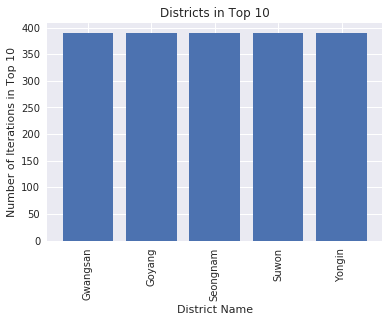

In [3]:
import glob
import os   
import pandas
import collections
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline 


all_files = glob.glob(os.path.join('./sim_res/', "*.csv"))   
df_set = (pandas.read_csv(f, header=None) for f in all_files)
all_simulation_results = pandas.concat(df_set, ignore_index=True)

accuracy_metric = all_simulation_results[5].values
all_simulation_results = all_simulation_results.drop(all_simulation_results.columns[5], axis=1)
print(accuracy_metric)

#Now, let's create our bar chart telling us how many times each one was picked.
flat_list = [item for sublist in all_simulation_results.values for item in sublist]
noNAList = [x for x in flat_list if str(x) != 'nan']
district_counts = (collections.Counter(noNAList)) #divide by 6 - might need a for loop


for k in district_counts:
    district_counts[k] = int(district_counts[k] / 6)

plt.bar(range(len(district_counts)), list(district_counts.values()), align='center')
plt.xticks(range(len(district_counts)), list(district_counts.keys()), rotation="vertical")
plt.ylabel("Number of Iterations in Top 10")
plt.xlabel("District Name")
plt.title("Districts in Top 10")
plt.show()

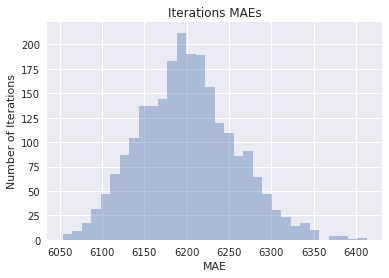

In [4]:
seaborn.distplot(accuracy_metric, norm_hist=False, kde=False)
plt.ylabel("Number of Iterations")
plt.xlabel('MAE')
plt.title('Iterations MAEs')